<a href="https://colab.research.google.com/github/AlumiK/tensorflow-notebooks/blob/main/TensorFlow2/02_linear_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Classification

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
N, D = X_train.shape

Epoch 1/100
12/12 [==============================] - 0s 11ms/step - loss: 1.4410 - accuracy: 0.1759 - val_loss: 1.2989 - val_accuracy: 0.2660
Epoch 2/100
12/12 [==============================] - 0s 3ms/step - loss: 1.3125 - accuracy: 0.1942 - val_loss: 1.1794 - val_accuracy: 0.2979
Epoch 3/100
12/12 [==============================] - 0s 3ms/step - loss: 1.1928 - accuracy: 0.2205 - val_loss: 1.0668 - val_accuracy: 0.3404
Epoch 4/100
12/12 [==============================] - 0s 3ms/step - loss: 1.0796 - accuracy: 0.2703 - val_loss: 0.9642 - val_accuracy: 0.3989
Epoch 5/100
12/12 [==============================] - 0s 3ms/step - loss: 0.9784 - accuracy: 0.3228 - val_loss: 0.8706 - val_accuracy: 0.4468
Epoch 6/100
12/12 [==============================] - 0s 3ms/step - loss: 0.8838 - accuracy: 0.3858 - val_loss: 0.7892 - val_accuracy: 0.5213
Epoch 7/100
12/12 [==============================] - 0s 3ms/step - loss: 0.8036 - accuracy: 0.4619 - val_loss: 0.7163 - val_accuracy: 0.5904
Epoch 8/100


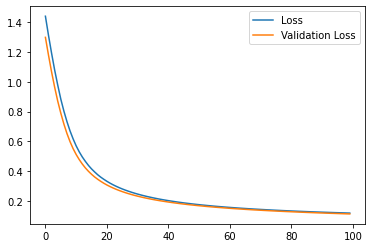

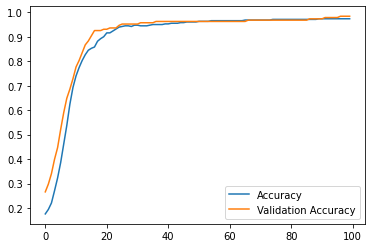

6/6 [==============================] - 0s 1ms/step - loss: 0.1112 - accuracy: 0.9840
Accuracy: 0.9840425252914429


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

plt.plot(r.history.get('loss'), label='Loss')
plt.plot(r.history.get('val_loss'), label='Validation Loss')
plt.legend()
plt.show()

plt.plot(r.history.get('accuracy'), label='Accuracy')
plt.plot(r.history.get('val_accuracy'), label='Validation Accuracy')
plt.legend()
plt.show()

print(f'Accuracy: {model.evaluate(X_test, y_test)[1]}')

## Save & load the model

In [ ]:
model.save('linear_classification.h5')
model_loaded = tf.keras.models.load_model('linear_classification.h5')
print(f'Accuracy of the loaded model: {model_loaded.evaluate(X_test, y_test)[1]}')

6/6 [==============================] - 0s 2ms/step - loss: 0.1112 - accuracy: 0.9840
Accuracy of the loaded model: 0.9840425252914429
